In [1]:
# ==============================
# Import the modules
# ==============================
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import logging, json
from sys import stdout

# Plotting settings
%matplotlib inline

In [2]:
# ==============================
# Create a logger
# ==============================

logger = logging.getLogger(__name__)

# Create console handler
consoleHandler = logging.StreamHandler(stdout)
consoleHandler.setLevel(logging.DEBUG)

# Create a time formatter
FORMAT = '[%(asctime)s:%(levelname)s] %(message)s'
formatter = logging.Formatter(FORMAT)
consoleHandler.setFormatter(formatter)

# Delete existing handler (if any)
if (logger.hasHandlers()):
    logger.info("Existing logging handers found")
    logger.handlers.clear()
    logger.info("Existing handlers have been deleted")
    
# Add the console handler and set console logging level
logger.addHandler(consoleHandler)
logger.setLevel(level=logging.DEBUG)

In [3]:
# ==============================
# Create dummy data 
# ==============================
logger.info("Create the dummy data..")
data = {
        'area'  : [2600, 3000, 3200, 3600, 4000, 2500, 2600, 3100, 5000, 4500],
        'price' : [550000, 565000, 610000, 680000, 725000, 500000, 510000, 600000, 815000, 478000]
        }
df = pd.DataFrame(data)
logger.info("Dummy data has been created")
df.head()

[2020-10-25 13:44:39,048:INFO] Create the dummy data..
[2020-10-25 13:44:39,058:INFO] Dummy data has been created


,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


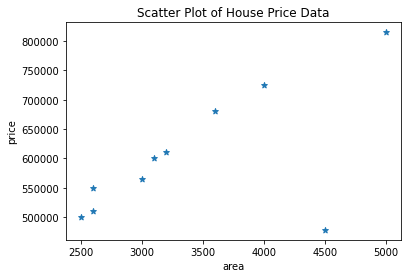

In [4]:
# Plot the data
plt.title("Scatter Plot of House Price Data")
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df['area'], df['price'],marker='*')

In [5]:
# ==========================
# Train and Test Split
# ==========================
logger.info("Creating train and test split..")
X = df['area']
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

logger.info("Shape of train data => X_train : {} and y_train : {}".format(X_train.shape, y_train.shape))
logger.info("Shape of test data  => X_test  : {} and y_test  : {}".format(X_test.shape, y_test.shape))

[2020-10-25 13:44:39,503:INFO] Creating train and test split..
[2020-10-25 13:44:39,508:INFO] Shape of train data => X_train : (7, 1) and y_train : (7, 1)
[2020-10-25 13:44:39,511:INFO] Shape of test data  => X_test  : (3, 1) and y_test  : (3, 1)


## Training and Forecast via Module

In [6]:
# ====================================
# Linear Regression model training
# ====================================
logger.info("Creating a linear regression model..")
model = linear_model.LinearRegression()
logger.info("Training the model..")

model.fit(X_train, y_train)
logger.info("Model has been trained!")

[2020-10-25 13:44:39,625:INFO] Creating a linear regression model..
[2020-10-25 13:44:39,628:INFO] Training the model..
[2020-10-25 13:44:39,634:INFO] Model has been trained!


In [7]:
model.predict(X_test)

array([[628775.3164557 ],
       [576142.40506329],
       [576142.40506329]])

In [8]:
x = 3000
x = [[x]]
model.predict(x)

array([[584914.55696203]])

In [15]:
def make_forecast(x_input):
    """
    Make the future step forecast
    """
    if np.isscalar(x_input):
        x_input = [[x_input]]
        prediction = model.predict(x_input)
        prediction = prediction[0][0]
        x_input = x_input[0][0]
        logger.info("Price prediction for area of {} is {}".format(x_input, prediction))
    else:
        pred = model.predict(x_input)
        prediction = {'Area'          : list(x_input.flatten()),
                      'Price_Forecast': list(pred.flatten())}
        prediction = pd.DataFrame(prediction)
        print(prediction)

In [16]:
make_forecast(5000)

[2020-10-25 13:48:53,022:INFO] Price prediction for area of 5000 is 628775.3164556962


In [17]:
make_forecast(X_test)

   Area  Price_Forecast
0  5000   628775.316456
1  2600   576142.405063
2  2600   576142.405063


## Training and Forecast via Logic